# COVID 19 CLASSIFICATION

Done by: Sebastián Sarasti

The COVID-19 disease provoked a global pandemic. It was an important worry around the world.

It was the reason why many people around the world passed away. Many stratigies were purposed to address COVID-19 and reduce the impact.

One way to diagnosticate people is by X-ray scans like this:

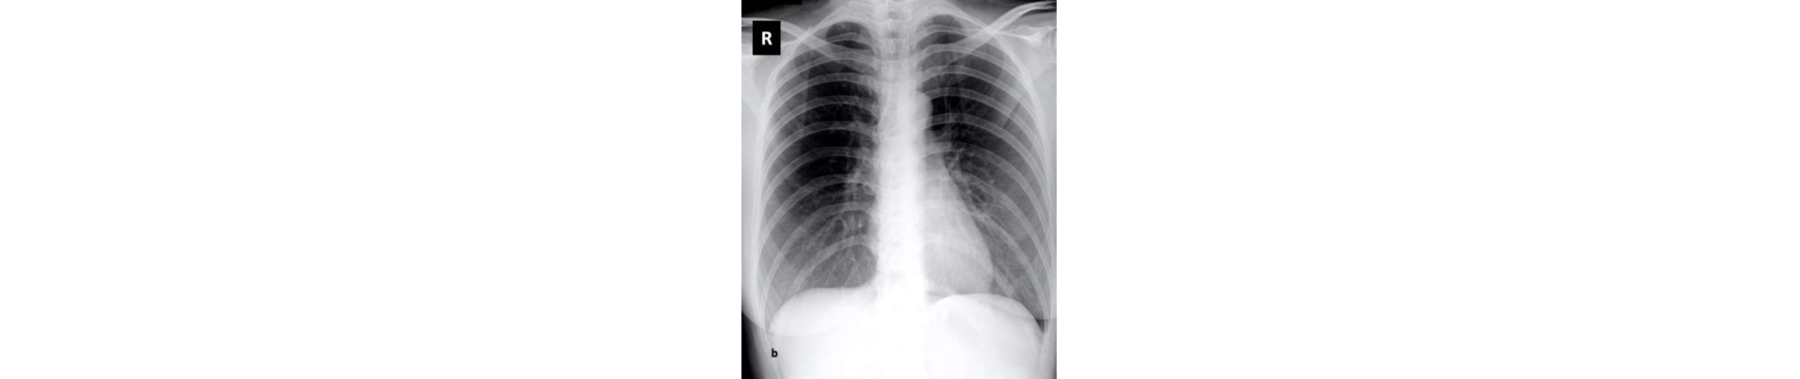

A possible option is to create a Convolutional Neural Network and try to predict the COVID-19 disease based only in the X-ray scan. 

This data set has x-ray scans labeled into three categories: covid, normal, and viral pneumonia.

The goal is generate an algorithm which is able to classify between each category

*Import basic libraries*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

*Import libraries to load the data*

In [2]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_gen = ImageDataGenerator(rescale=1/255,validation_split=0.2)
test_gen = ImageDataGenerator(rescale=1/255)
train_data = train_gen.flow_from_directory(directory='../input/covid19-image-dataset/Covid19-dataset/train', 
                                           target_size=(300,300), subset='training')
val_data = train_gen.flow_from_directory(directory='../input/covid19-image-dataset/Covid19-dataset/train', 
                                           target_size=(300,300),subset='validation')
test_data = test_gen.flow_from_directory(directory='../input/covid19-image-dataset/Covid19-dataset/test', 
                                         target_size=(300,300))

Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


*Verify the data loaded*

In [4]:
train_data.class_indices.keys()

dict_keys(['Covid', 'Normal', 'Viral Pneumonia'])

### Create the CNN architecture

*Import the needed modules*

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Dense, Flatten
from keras.regularizers import l1, l2

*Define the CNN structure*

In [6]:
a=0.07
model = Sequential()
model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',strides=(1,1), activation='relu',input_shape=(300,300,3), 
                 kernel_regularizer=l2(a), bias_regularizer=l2(a)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',strides=(1,1), activation='relu',kernel_regularizer=l2(a), bias_regularizer=l2(a)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',strides=(1,1), activation='relu',kernel_regularizer=l2(a), bias_regularizer=l2(a)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',strides=(1,1), activation='relu',
                 kernel_regularizer=l2(a), bias_regularizer=l2(a)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',strides=(1,1), activation='relu', 
                 kernel_regularizer=l2(a), bias_regularizer=l2(a)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dropout(0.3))

model.add(Dense(10,activation='relu', kernel_regularizer=l2(a), bias_regularizer=l2(a)))
model.add(Dropout(0.3))

model.add(Dense(3,activation = 'softmax'))

2022-09-16 13:23:17.780412: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-16 13:23:17.905785: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-16 13:23:17.909953: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-16 13:23:17.914620: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

* See all the architecture and parameters of the CNN*

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 256)     7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 256)     0         
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 256)     1024      
_________________________________________________________________
dropout (Dropout)            (None, 150, 150, 256)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 128)     295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 128)       5

*Define a callback to save the best model according to the accuracy*

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint
check = ModelCheckpoint('covid_19.hdf5',monitor='val_accuracy',save_best_only=True)

*Compile and train the CNN model*

In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
model.fit(train_data,epochs=5,validation_data=val_data,callbacks=[check])

2022-09-16 13:23:24.232783: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5


2022-09-16 13:23:29.652199: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


7/7 [==============================] - 33s 3s/step - loss: 40.5146 - accuracy: 0.5323 - val_loss: 38.3862 - val_accuracy: 0.4200
Epoch 2/5
7/7 [==============================] - 14s 2s/step - loss: 36.2881 - accuracy: 0.7363 - val_loss: 34.1112 - val_accuracy: 0.4400
Epoch 3/5
7/7 [==============================] - 14s 2s/step - loss: 31.8253 - accuracy: 0.8657 - val_loss: 30.0777 - val_accuracy: 0.4400
Epoch 4/5
7/7 [==============================] - 13s 2s/step - loss: 27.6331 - accuracy: 0.8458 - val_loss: 26.9424 - val_accuracy: 0.4400
Epoch 5/5
7/7 [==============================] - 14s 2s/step - loss: 23.6927 - accuracy: 0.8458 - val_loss: 24.1411 - val_accuracy: 0.4400


*load the best model to see the capabilities to predict*

In [10]:
from tensorflow.keras.models import load_model
final_model = load_model('covid_19.hdf5')

*See the results*

In [11]:
final_model.evaluate(test_data)

3/3 [==============================] - 3s 739ms/step - loss: 34.1512 - accuracy: 0.3939


[34.15118408203125, 0.39393940567970276]

## Partial Conclusion:

Even though the CNN is big, it is not able to generalize and get good results with the test data.

A possible reason might be that the CNN is overfitting in the training data set.

A solution is to create a simple CNN and try to see if the CNN is able to generalize and get good results with the test data.

*New simple model*

In [12]:
model1 = Sequential()

model1.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',strides=(1,1), activation='relu',input_shape=(300,300,3)))
model1.add(MaxPooling2D(pool_size=(4,4)))
model1.add(BatchNormalization())


model1.add(Flatten())


model1.add(Dense(3,activation='softmax'))


*See the model architecture*

In [13]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 300, 300, 64)      1792      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
flatten_1 (Flatten)          (None, 360000)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 1080003   
Total params: 1,082,051
Trainable params: 1,081,923
Non-trainable params: 128
_________________________________________________________________


In [14]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

*Train the model*

In [15]:
model1.fit(train_data,epochs=15,validation_data=val_data,callbacks=[check])

Epoch 1/15
7/7 [==============================] - 15s 2s/step - loss: 8.7381 - accuracy: 0.7463 - val_loss: 1.4420 - val_accuracy: 0.7400
Epoch 2/15
7/7 [==============================] - 13s 2s/step - loss: 1.6476 - accuracy: 0.9353 - val_loss: 2.1251 - val_accuracy: 0.6200
Epoch 3/15
7/7 [==============================] - 12s 2s/step - loss: 0.4108 - accuracy: 0.9652 - val_loss: 1.9146 - val_accuracy: 0.6800
Epoch 4/15
7/7 [==============================] - 13s 2s/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 2.0627 - val_accuracy: 0.6600
Epoch 5/15
7/7 [==============================] - 13s 2s/step - loss: 0.2264 - accuracy: 0.9851 - val_loss: 1.6465 - val_accuracy: 0.7200
Epoch 6/15
7/7 [==============================] - 12s 2s/step - loss: 4.8632e-08 - accuracy: 1.0000 - val_loss: 1.0829 - val_accuracy: 0.7800
Epoch 7/15
7/7 [==============================] - 13s 2s/step - loss: 0.0552 - accuracy: 0.9900 - val_loss: 1.2591 - val_accuracy: 0.8000
Epoch 8/15
7/7 [==============

*Verify if the model was able to learn well*

In [16]:
model1.evaluate(test_data)

3/3 [==============================] - 2s 552ms/step - loss: 1.7628 - accuracy: 0.7121


[1.762752890586853, 0.7121211886405945]

## Partial Conclusion:

The model again was not able to generalize the learning, so based on the current amount of data. The source of this error might be that data are not as large to extract enough information.

In the cases were is not available enough data, a solution is to use transfer learning

*Import the model from Keras*

In [17]:
from tensorflow.keras.applications import ResNet152V2

*Resize the data to fit into the ResNetV2 architecture*

In [18]:
train_gen_resize = ImageDataGenerator(rescale=1/255,validation_split=0.2)
test_gen_resize = ImageDataGenerator(rescale=1/255)
train_data_resize = train_gen_resize.flow_from_directory(directory='../input/covid19-image-dataset/Covid19-dataset/train', 
                                           target_size=(224, 224), subset='training', color_mode = 'rgb', batch_size=32, shuffle=True)
val_data_resize = train_gen_resize.flow_from_directory(directory='../input/covid19-image-dataset/Covid19-dataset/train', 
                                           target_size=(224, 224),subset='validation', color_mode = 'rgb', batch_size=32, shuffle=True)
test_data_resize = test_gen_resize.flow_from_directory(directory='../input/covid19-image-dataset/Covid19-dataset/test', 
                                         target_size=(224, 224), color_mode = 'rgb', batch_size=32, shuffle=True)

Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


*Avoid a retraining in the ResNet model*

In [19]:
pre_trained_model = ResNet152V2(include_top = False,input_shape =(224,224,3))
for layer in pre_trained_model.layers:
    layer.trainable = False

234561536/234545216 [==============================] - 4s 0us/step


*See the model architecture*

In [20]:
pre_trained_model.summary()

Model: "resnet152v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
________________________________________________________________________________________

*Get the last layer*

In [21]:
last_layer = pre_trained_model.get_layer('post_relu')
last_output = last_layer.output

*Use the entire previus model and add few layers to train*

In [22]:
from tensorflow.keras.layers import Flatten

In [23]:
x = Flatten()(last_output)
x = Dense(units=128, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(units=50, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(units=3, activation = 'softmax')(x)

In [24]:
import tensorflow as tf

In [25]:
model_tl = tf.keras.Model(pre_trained_model.input, x)

In [26]:
model_tl.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

See the new trainable parameters of the model

In [27]:
model_tl.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [28]:
model_tl.fit(train_data_resize, epochs = 15, validation_data = val_data_resize, verbose = 2)

Epoch 1/15
7/7 - 30s - loss: 10.1729 - accuracy: 0.5920 - val_loss: 3.4295 - val_accuracy: 0.7800
Epoch 2/15
7/7 - 13s - loss: 2.2507 - accuracy: 0.8308 - val_loss: 4.7401 - val_accuracy: 0.7800
Epoch 3/15
7/7 - 13s - loss: 2.4589 - accuracy: 0.8856 - val_loss: 1.9960 - val_accuracy: 0.8600
Epoch 4/15
7/7 - 12s - loss: 0.9133 - accuracy: 0.9254 - val_loss: 2.7696 - val_accuracy: 0.8800
Epoch 5/15
7/7 - 12s - loss: 0.8698 - accuracy: 0.9204 - val_loss: 1.2617 - val_accuracy: 0.9000
Epoch 6/15
7/7 - 13s - loss: 0.7058 - accuracy: 0.9353 - val_loss: 1.8978 - val_accuracy: 0.8600
Epoch 7/15
7/7 - 12s - loss: 0.1057 - accuracy: 0.9801 - val_loss: 1.7545 - val_accuracy: 0.9000
Epoch 8/15
7/7 - 14s - loss: 0.1070 - accuracy: 0.9801 - val_loss: 1.5525 - val_accuracy: 0.8800
Epoch 9/15
7/7 - 13s - loss: 0.1141 - accuracy: 0.9851 - val_loss: 1.3134 - val_accuracy: 0.8400
Epoch 10/15
7/7 - 12s - loss: 0.0361 - accuracy: 0.9851 - val_loss: 2.4963 - val_accuracy: 0.9200
Epoch 11/15
7/7 - 13s - loss

See if the algorithm was able to generalize and learn well

In [29]:
model_tl.evaluate(test_data_resize)

3/3 [==============================] - 2s 629ms/step - loss: 1.0372 - accuracy: 0.9242


[1.0372493267059326, 0.9242424368858337]

## Final conclusions

1. With CNN architectures purposed was not possible to have acuraccies higher than 0.44 roughly. The CNN convolutes around this value. In some iterations, it is possible to get a higher accuracy, but, after the accuracy comes back to 0.44.

2. The data is not enough to generalize the problem. It is recommended to increase the size of the data set.

3. The data should be treated before the CNN model. For instance, it should be applied filters that could seem to give extra features for the classification.

4. Only 5 epochs were done because more than this number, do not increase the accuracy in the model. However, the loss function result do increase. 

5. It was thought that I might be a overfitting issue, but with a simple CNN also was not able to get acuraccies higher than 0.5

6. The best solution was using transfer learning. Transfer Learning uses another pretrained architecture and applies this into the new problem.

## Final results

The final model was able to get an acuraccy of 0.92 and a loss of 0.65, so this model can be deploy to predict COVID-19 disease based only in the X-ray